https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

- Our Dataset

https://www.kaggle.com/code/tentotheminus9/what-causes-heart-disease-explaining-the-model?scriptVersionId=11135525&cellId=10

- Has deeper explianations


It's a clean, easy to understand set of data. However, the meaning of some of

1.   List item
2.   List item

the column headers are not obvious. Here's what they mean,

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

1. Number of Records:
 The dataset contains 303 records (rows), which represent individual patient data.
2. Number and Types of Features:
The dataset has a total of 14 columns (features), including the target class.
These features include a mix of numeric and categorical variables, such as:
Numerical Features:
age: Age of the patient.
trestbps: Resting blood pressure (mm Hg).
chol: Serum cholesterol in mg/dl.
thalach: Maximum heart rate achieved.
oldpeak: ST depression induced by exercise relative to rest.
Categorical Features:
sex: Gender (1 = male, 0 = female).
cp: Chest pain type (0 to 3).
fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
restecg: Resting electrocardiographic results (0, 1, 2).
exang: Exercise-induced angina (1 = yes, 0 = no).
slope: The slope of the peak exercise ST segment (0, 1, 2).
ca: Number of major vessels colored by fluoroscopy (0 to 3).
thal: Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect).
3. Detected Anomalies:
Some common anomalies that has been detected in this dataset:
Missing Values
Inconsistent Categorical Data: For example, values in the ca (number of major vessels) or thal (thalassemia) columns  need closer inspection for consistency.
4. Which Feature is the Target Class:
target: This is a binary variable where:
1 = The patient has heart disease.
0 = The patient does not have heart disease.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('heart.csv')
data.shape

(303, 14)

#Renaming the cols

In [ ]:
# Assuming 'df' is your DataFrame
data = data.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest_Pain',
    'trtbps': 'Rest_BP',
    'chol': 'Cholesterol',
    'fbs': 'Fasting_BS',
    'restecg': 'Rest_ECG',
    'thalachh': 'Max_HR',
    'exng': 'Ex_Angina',
    'oldpeak': 'ST_Depression',
    'slp': 'Slope',
    'caa': 'Vessel_Count',
    'thall': 'Max_HR_PostEx',  # Max Heart Rate for thall
    'output': 'Heart_Disease'
})


data = pd.DataFrame(data)
data.head()

,Age,Sex,Chest_Pain,Rest_BP,Cholesterol,Fasting_BS,Rest_ECG,Max_HR,Ex_Angina,ST_Depression,Slope,Vessel_Count,Max_HR_PostEx,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Checking nulls

#Stats on each col

In [ ]:
X = data.drop(['Heart_Disease'], axis=1)

y = data['Heart_Disease'];

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check data types in X_train

X_train.dtypes

,0
Age,int64
Sex,int64
Chest_Pain,int64
Rest_BP,int64
Cholesterol,int64
Fasting_BS,int64
Rest_ECG,int64
Max_HR,int64
Ex_Angina,int64
ST_Depression,float64


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# instantiate the models
knn = KNeighborsClassifier(n_neighbors=9)
nb = GaussianNB()
tree = DecisionTreeClassifier()



# fit the model to the training set
knn.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=9)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_nb = nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model(KNN) accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# print('Model(Decision Tree) accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_tree)))
print('Model(NB) accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model(KNN) accuracy score: 0.8525
Model(NB) accuracy score: 0.8525


In [ ]:
# print the scores on training and test set
print('KNN MODEL')
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))
print('---------------------------------------')

# print('Decision Tree Model')
# print('Training set score: {:.4f}'.format(tree.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(tree.score(X_test, y_test)))
# print('---------------------------------------')

print('Naive Bayes Model')
print('Training set score: {:.4f}'.format(nb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(nb.score(X_test, y_test)))
print('---------------------------------------')

KNN MODEL
Training set score: 0.8554
Test set score: 0.8525
---------------------------------------
Naive Bayes Model
Training set score: 0.8347
Test set score: 0.8525
---------------------------------------


KNN MODEL
Training set score: 0.8554
Test set score: 0.8525


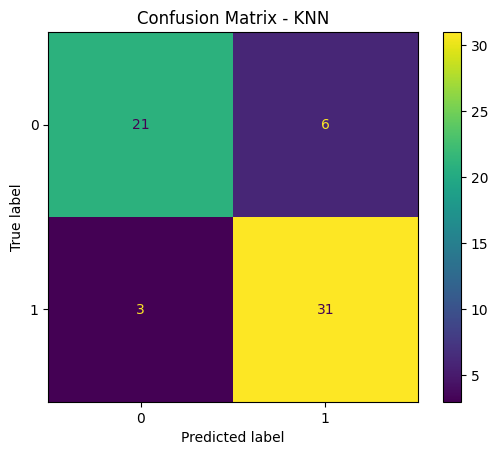

Metrics:
  Accuracy: 0.8525
  Precision: 0.8378
  Recall (TPR): 0.9118
  F1 Score: 0.8732


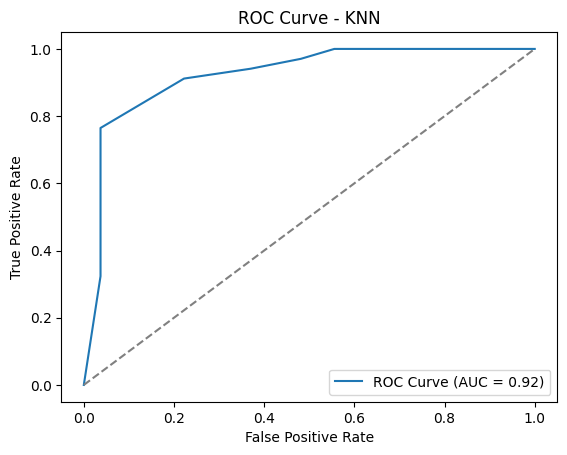

---------------------------------------

NAIVE BAYES MODEL
Training set score: 0.8347
Test set score: 0.8525


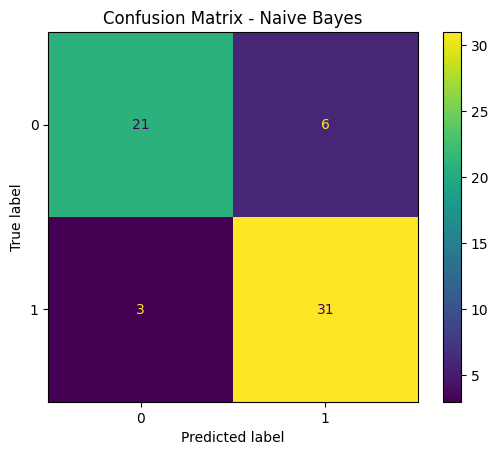

Metrics:
  Accuracy: 0.8525
  Precision: 0.8378
  Recall (TPR): 0.9118
  F1 Score: 0.8732


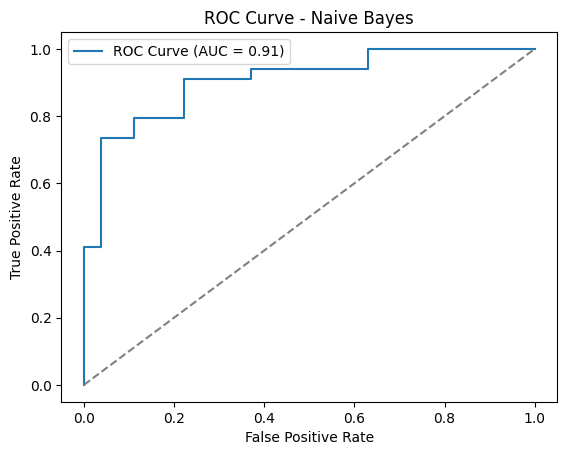

---------------------------------------



In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Function to print metrics and plot ROC
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"{model_name.upper()} MODEL")

    # Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Training set score: {train_score:.4f}")
    print(f"Test set score: {test_score:.4f}")

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall (TPR): {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

    # ROC Curve
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {model_name}")
        plt.legend()
        plt.show()

    print("---------------------------------------\n")

# Evaluate models
evaluate_model(knn, X_train, y_train, X_test, y_test, "KNN")
# evaluate_model(tree, X_train, y_train, X_test, y_test, "Decision Tree")
evaluate_model(nb, X_train, y_train, X_test, y_test, "Naive Bayes")